## Importy bibliotek

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Transformata Fouriera
##  Analiza Fouriera jako rzutowanie wektorów
W tym zadaniu chciałbym abyśmy wyrobili sobie intuicję, że analiza Fouriera moze być rozumiana jako badanie sygnału (niech nazywa się syg) za pomocą pewnych znanych funkcji (będą to funkcje sin i cos). Jak już mówiliśmy o sygnałach można myśleć, że są to wektory. Jeśli chcemy zbadać, czy dwa wektory są podobne do siebie to liczymy ich iloczyn skalarny. Zobaczmy jak to działa w poniższym zadaniu:

In [3]:
T = 1 # ustawiamy długość czasu
Fs = 100 # ustawiamy częstość próbkowania
t = np.arange(0,T,1/Fs) #wytwarzamy wektor czasu



def sinFromTimeVector(t=np.arange(0,T,.01), f = 1, phi =0 ):
    return np.sin(2*np.pi*f*t + phi)

s1 = sinFromTimeVector(f=3, t=t, )
s2 = sinFromTimeVector(f=7, t=t, phi=np.pi/2)

syg = s1 + s2 # wytwarzamy sygnał będący sumą sinusa o cz. 3Hz i 
         # cos o częstości 7Hz

syg = syg/np.linalg.norm(syg) # normalizujemy badany sygnał

print("częstość\tsin\tcos" ) # szykujemy nagłówek wydruku

for n in range(1,11): # dla liczb n z zakresu 1 do 10
    test_sin = sinFromTimeVector(f=n, t=t) # tworzymy sygnał testowy sinus o częstości n Hz
    test_sin = test_sin/np.linalg.norm(test_sin) # normalizujemy ten sygnał testowy
    test_cos = sinFromTimeVector(f=n, t=t, phi=np.pi/2) # tworzymy testowego cosinusa o częstości n Hz
    test_cos = test_cos/np.linalg.norm(test_cos) # normalizujemy 
    
    rzut_s = np.dot(test_sin,syg) # obliczamy iloczyn skalarny sygnału z testowym sinusem
    rzut_p = np.dot(test_cos,syg) # obliczamy iloczyn skalarny z testowym cosinusem
    print("%d\t%.3f\t%.3f" %(n,rzut_s, rzut_p)) # wypisujemy wyniki

częstość	sin	cos
1	-0.000	-0.000
2	0.000	-0.000
3	0.707	-0.000
4	0.000	-0.000
5	0.000	-0.000
6	0.000	0.000
7	-0.000	0.707
8	0.000	0.000
9	0.000	0.000
10	0.000	0.000


<hr>

## Zespolone eksponensy
> Ciągłą funkcję  okresową (sygnał okresowy) można przedstawić w postaci  [Szereg_Fouriera](https://brain.fuw.edu.pl/edu/index.php/Szereg_Fouriera) &mdash; czyli sumy zespolonych funkcji exponencjalnych. Współczynniki w szeregu Fouriera to liczby, w ogólności zespolone, które mówią z jaką amplitudą i z jaką fazą wchodzi do sumy odpowiadająca mu funkcja. Współczynniki te numerowane są od $-\infty$ do $\infty$. Dla sygnałów rzeczywistych współczynniki występują w sprzężonych parach co powoduje, że zgodnie ze wzorami Eulera:

<center>
$e^{ix}=\cos x + i\sin x \quad \Rightarrow \begin{cases}\cos x = \frac12(e^{ix}+e^{-ix})\\ \sin x = \frac{1}{2i}(e^{ix}-e^{-ix}) \end{cases}$
</center>

>szereg można zwinąć do szeregu funkcji sinusoidalnych.

# Zadanie: wykreślanie funkcji trygonometrycznej zapisanej jako zespolone eksponensy 
Dla przypomnienia:
* uzyskanie liczby zespolonej $i$ w pythonie mamy jako <tt> 1j</tt>.
* jeśli prowadzimy obliczenia na liczbach zespolonych to w wyniku dostajemy liczby zespolone (nawet jeśli ich część urojona jest 0). Aby rzutować wynik na liczby rzeczywiste musimy wykonać funkcję <tt>np.real(.)</tt>

Proszę narysować wykres funkcji 

$f(t) = c \left(e^{i2 \pi \frac{  n  }{T}t } + e^{-i 2 \pi \frac{ n }{T} t  }\right)$ dla $t \in (-\pi,\, \pi); \quad T = 2 \pi$. 

Odstęp między próbkami proszę ustawić na 0.001.  

* Obejrzeć wykresy dla $n \in \{0, 1, 2, 5\}$. 
* Jaki sens ma liczba $n$? 
* Jaki sens ma liczba $c$?

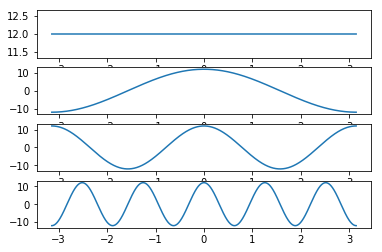

In [4]:
t = np.arange(-np.pi, np.pi,0.001)
n_s = [0,1,2,5]


def f(c,n,t=np.arange(-np.pi, np.pi,0.001),T=2*np.pi):
    
    i = complex(0,1)
    e = np.e
    return c*(e**(i*2*np.pi*(n/T)*t)+e**(-i*2*np.pi*(n/T)*t))


for n in range(len(n_s)):
    plt.subplot(len(n_s),1,n+1)
    plt.plot(t,f(n=n_s[n],c=6,t=t).real) #Część urojona jest zerowa, konwertujemy do liczb rzeczuwistych
plt.show()

<hr>

## Zadanie: Rekonstrukcja sygnału ze współczynników Fouriera
Funkcja  o okresie 2, w podstawowym okresie dana jest ona wzorem:

$ f(t)=|t| $ dla $|t|<1$,

Za pomocą wykresu coraz to większej liczby składników jej szeregu Fouriera sprawdź jego  zbieżność.

> ### Obliczenia analityczne
>
> Musimy obliczyć następującą całkę:
> 
> $ c_n = \frac{1}{2} \int_{-1}^1 {|t| e^{\frac{2 \pi j n t }{2}} dt} = 
\frac{1}{2} \left[ \int_{-1}^0{ -t e^{\pi j n t }dt} + \int_{0}^1 {t e^{\pi j n t }dt} \right]$
>
> Przypomnijmy sobie, że:
> 
> $\int x e^{ax}dx = \frac{1}{a^2} e^{ax} (ax-1) $
> 
> Zatem nasze $c_n$:
> 
> $c_n = \frac{1}{\pi^2 n^2} 
 \left[ 
- \left[ e^{\pi j n t} \frac{\pi j n t -1}{(\pi j n)^2} \right]_{-1}^0 
+
   \left[ e^{\pi j n t} \frac{\pi j n t -1 }{(\pi j n)^2}   \right]_{0}^1
\right] = $

> $ = \frac{1}{2 \pi^2 n^2} 
\left[ -2+ \pi j n \left( e^{-\pi j n} - e^{\pi j n} \right) + \left( e^{-\pi j n} + e^{\pi j n} \right)
\right]$
> 
> Korzystając ze wzorów Eulera możemy zwinąć to wyrażenie do funkcji trygonometrycznych:
>
> $c_n =  \frac{1}{ \pi^2 n^2} (\cos(\pi n ) - \sin(\pi n)  -1)$

### Rekonstrukcja sygnałów:
Na podstawie wyników obliczeń analitycznych proszę napisać program, który demonstruje jaki jest wynik składania coraz większej liczby czynników.



Zacznijmy od implementacji funkcji obliczającej współczynnik fourierowski dla zadanego `n`. W implementacji musimy zwrócić uwagę na fakt, że:
* $\lim_{n \rightarrow 0} \frac{1}{ \pi^2 n^2} \left(\cos(\pi n )-\sin(\pi n)  -1\right) = \frac{1}{2} $
* zaś dla pozostałych ''n'' całkowitych możemy uwzględnić, że $ \sin(\pi n) = 0$.

In [5]:
def skladnik_modul_t(n):
    '''Funkcja obliczająca n-ty element szeregu Fouriera dla funkcji moduł t
           n - który element szeregu'''
     
    if n==0:
        c_n = .5
    else:
        const_ = (np.pi)**2
        
        c_n = c_n = 1/((np.pi**2)*(n**2))*(np.cos(np.pi*n) - np.sin(np.pi*n) - 1)
    return c_n


Poniższy kod implementuje sumowanie zadanej liczby składników szeregu i ilustruje wynik.
* Proszę uruchomić go dla <tt>N={2, 4, 6, 20}</tt>:
* Proszę zwrócić uwagę, że otrzymywane sumy są równe swojej części rzeczywistej 

(-0.1, 1.1)

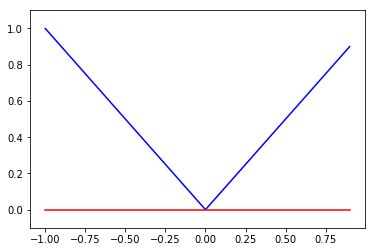

In [6]:
t = np.arange(-1,1,0.1)
syg = np.zeros(len(t),dtype='complex')
 
N = 1000 # ustalamy ile par zespolonych eksponensów sumujemy
for n in range(-N,N+1):
    c = skladnik_modul_t(n)
    #print ('n= %d, c= %.2f'%(n,c))
    syg += c * np.exp(np.pi*1j*n*t)

plt.plot(t,syg.real,'b', t, syg.imag,'r')
plt.ylim((-0.1, 1.1))

* jak wygląda rekonstruowany sygnał poza przedziałem t  =(-1,1) ?

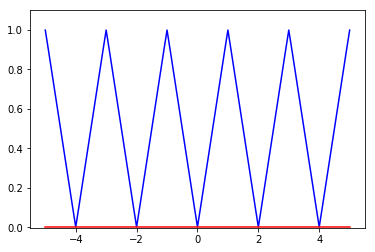

In [7]:
t_ext = np.arange(-5,5.1,0.1)

syg2 = np.zeros(len(t_ext),dtype='complex')
N= 100
for n in range(-N,N+1):
    c = skladnik_modul_t(n)
    syg2 += c * np.exp(np.pi*1j*n*t_ext)

plt.plot(t_ext,syg2.real,'b', t_ext,syg2.imag,'r')
plt.ylim((-min(syg2.real)*1.1, 1.1*max(syg2.real)))
plt.show()

<hr>

## Zadanie: szereg Fouriera funkcji moduł cosinus 
* Analogicznie do powyższego przykładu proszę znaleźć i zbadać szereg Fouriera dla funkcji:
$ f(t) = |cos(t)|$
<a href = "http://www.wolframalpha.com/input/?i=integrate+cos(x)+exp(ax)+dx"> wskazówka </a>

In [8]:
def skladnik(n):
    i = complex(0,1)
    if n==1 or n==-1:
        return 0
    else:
        return -(i *(1 + np.e**(i*np.pi*n)) *(np.e**(i*np.pi*n)* n - n - 2* i* np.e**((i*np.pi*n)/2)))/(2*np.pi*(n**2 - 1))


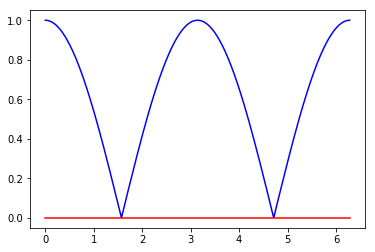

In [9]:
i = complex(0,1)
t = np.arange(0, 2*np.pi, 0.01)
syg = np.zeros(len(t),dtype='complex')
N = 300
for n in range(-N,N+1):
    c = skladnik(n)
    syg += c * np.exp(i*n*t)
plt.plot(t,syg.real,'b', t, syg.imag,'r')
plt.show()

<hr>

## Zadanie: zaimplementować ilustrację sumowania szeregu Fouriera dla sygnału prostokątnego (przykład z wykładu):

In [10]:
def skladnik_modul_t(n):

    if n==0:
        return 1/2
    elif n%2 == 0:
        return 0
    else:
        return (1j/(np.pi*n))


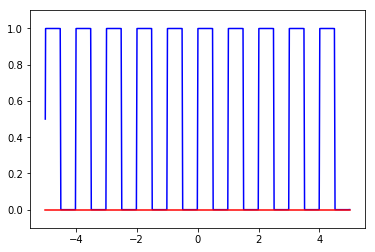

In [11]:
t = np.arange(-5, 5, 0.01)
syg = np.zeros(len(t),dtype='complex')
 
N = 10000 
i = complex(0,1)

for n in range(-N,N+1):
    c = skladnik_modul_t(n)
    #print ('n= %d, c= %.2f'%(n,elem))
    syg += c * np.exp(-2*i*np.pi*n*t)
plt.plot(t, syg.real,'b', t, syg.imag,'r')
plt.ylim((-0.1, 1.1))
plt.show()

<hr>

## Dyskretna Transformata Fouriera (DFT)

> W praktycznych zastosowaniach mamy do czynienia z sygnałami próbkowanymi o skończonej długości. Transformata Fouriera działająca na takich sygnałach nazywana jest Dyskretną Transformatą Fouriera, a algorytm najczęściej wykorzystywany do jej obliczania to szybka trasnsformata Fouriera (Fast Fourier Transform FFT). 
Formułę na współczynniki FFT można otrzymać z [szeregu Fouriera](https://brain.fuw.edu.pl/edu/index.php/Szereg_Fouriera). Załóżmy, że sygnał który chcemy przetransformować składa się z $N$ próbek.

> $\qquad$$ s =\{ s[0],\dots,s[n],\dots s[N-1]\}$ 

> i próbki pobierane były co $T_s$ sekund. Zakładamy, że analizowany sygnał $s$  to jeden okres nieskończonego sygnału o  okresie  $T=N\cdot T_s$. Wprowadźmy oznaczenie: 

> $\qquad$$s[n]=s(nT_s)$. 

> Przepiszmy wzór na współczynniki szeregu Fouriera. Ponieważ sygnał jest teraz dyskretny, całka zamieni się na sumę Riemanna: pole będzie sumą pól prostokątów o bokach równych wartości funkcji podcałkowej w zadanych punktach $x(nT_s)\exp(2i{\pi}knT_s/T)$ i odległości między punktami $T_s$:

> $\qquad$$
S[k] = \frac{1}{NT_s}\sum_{n=0}^{N-1}s(nT_s)e^{2i\pi\frac{knT_s}{NT_s}}T_s = \frac{1}{N}\sum_{n=0}^{N-1}s[n]e^{2i{\pi}\frac{kn}{N}}
$

> DFT zaimplementowana w <tt>numpy.fft</tt> jest określona jako:

> $\qquad$$A[k] =  \sum_{m=0}^{n-1} a[m] \exp\left\{-2\pi i{mk \over n}\right\}       \qquad k = 0,\ldots,n-1.
$

> DFT jest w ogólności zdefiniowane dla zespolonych argumentów i zwraca zespolone współczynniki. 
Odwrotna dyskretna transformata Fouriera jest zdefiniowana jako:

> $\qquad$$ a[m] = \frac{1}{n}\sum_{k=0}^{n-1}A[k]\exp\left\{2\pi i{mk\over n}\right\}
       \qquad m = 0,\ldots,n-1.
$

> Zwróćmy uwagę, że różni się ona do transformaty ''wprost'' jedynie znakiem w exponencie i normalizacją $1/n$.


## FFT
> * Dokumentacja numpy: http://docs.scipy.org/doc/numpy/reference/routines.fft.html
> * numpy implementuje algorytm: [https://www.jstor.org/stable/2003354?seq=1#page_scan_tab_contents  "An Algorithm for the Machine Calculation of Complex Fourier Series"] James W. Cooley and John W. Tukey Mathematics of Computation Vol. 19, No. 90 (Apr., 1965), pp. 297-301.

> Wartości zwracane przez <tt>fft(a,n)</tt> (<tt>a</tt> sygnał, <tt>n</tt> ilość punktów transformaty) mają następujący ''standardowy'' porządek:    
Jeśli <tt>A = fft(a, n)</tt>, to 
* <tt>A[0]</tt> zawiera składową stałą (średnią sygnału)
* <tt>A[1:n/2]</tt> zawiera współczynniki odpowiadające dodatnim częstościom
* <tt>A[n/2+1:]</tt> zawiera współczynniki odpowiadające ujemnym częstościom w kolejności od bardziej do mniej ujemnych.
* Dla parzystego ''n''  <tt>A[n/2]</tt> reprezentuje dodatnia i ujemną częstość Nyquista i dla sygnałów rzeczywistych jest liczbą rzeczywistą. 
* Dla nieparzystego <tt>n</tt>, element <tt>A[(n-1)/2]</tt> zawiera współczynnik dla największej częstości dodatniej a element <tt>A[(n+1)/2]</tt> zawiera współczynnik dla największej częstości ujemnej.

> Funkcja <tt>numpy.fft.fftfreq(len(A),1.0/Fs)</tt> zwraca macierz częstości odpowiadających poszczególnym elementom wyjściowym.

> Składnia:  <tt>numpy.fft.fftfreq(n, d=1.0)</tt>
Parametry:
* <tt>n : int</tt> &mdash; długość okna.
* <tt>d : skalar</tt> &mdash; okres próbkowania (odwrotność częstości próbkowania).
Zwracane częstości są obliczane w następujący sposób:
* <tt>f = [0,1,...,n/2-1,-n/2,...,-1]/(d*n)</tt>         jeśli <tt>n</tt> jest przyste
* <tt>f = [0,1,...,(n-1)/2,-(n-1)/2,...,-1]/(d*n) </tt>  jeśli  <tt>n</tt> jest nieparzyste. 
    
> Funkcja <tt>numpy.fft.fftshift(A)</tt> przestawia wektor wyjściowy <tt>fft</tt> i wektor częstości, tak aby częstość zero wypadała w środku. Zastosowanie funkcji <tt>numpy.fft.ifftshift(A)</tt> odwraca działanie <tt>numpy.fft.fftshift(.)</tt>.
    
> Jeśli potraktujemy wejście <tt>a</tt> jako sygnał w dziedzinie czasu i policzymy <tt>A = fft(a)</tt>, wówczas <tt>np.abs(A)</tt> jest widmem amplitudowym, zaś <tt>np.abs(A)**2</tt> jest widmem mocy. Można obliczyć także widmo fazowe za pomocą funkcji  <tt>np.angle(A)</tt>.

<hr>

### Zadanie: współczynniki zwracane przez FFT 

a)  Proszę wygenerować cosinusoidę oraz sinusoidę o długości 1 s, częstości 2 Hz próbkowaną 10 Hz. Proszę obliczyć współczynniki i wypisać je. 
* Jakiego typu liczby otrzymaliśmy?
* Czy istnieją jakieś związki między współczynnikami?
* Jaki jest związek między długością wejściowego sygnału i wyjściowych współczynników?

-------------------------------COS------------------------------------
[ -2.22044605e-15 +0.00000000e+00j   9.19392667e-16 -9.78859081e-16j
   5.00000000e+00 +5.88424455e-18j  -1.97747701e-16 -1.58382726e-15j
   3.55271368e-15 +1.17099423e-15j  -1.44328993e-15 +0.00000000e+00j
   3.55271368e-15 -1.17099423e-15j  -1.97747701e-16 +1.58382726e-15j
   5.00000000e+00 -5.88424455e-18j   9.19392667e-16 +9.78859081e-16j]
----------------------------------------------------------------------
Współczynniki ze znaczącymi wartościami [ 5. +5.88424455e-18j  5. -5.88424455e-18j]
----------------------------------------------------------------------
<class 'numpy.complex128'>
10 10
-------------------------------SIN------------------------------------
[  1.99159850e-16 +0.00000000e+00j   1.12703684e-16 +6.98788177e-16j
  -6.04205078e-16 -5.00000000e+00j  -1.14230233e-17 -2.85955148e-16j
  -1.07698247e-16 +1.77635684e-15j   1.02208548e-15 -8.87468518e-31j
  -1.07698247e-16 -1.77635684e-15j  -1.1423023

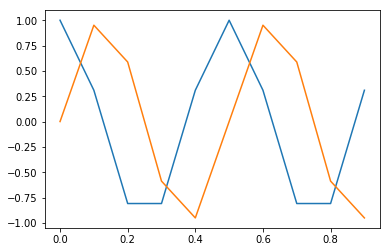

In [12]:
def sin(f=1, T=1, fs=128, phi=0 ):
    '''sin o zadanej częstości (w Hz), długości, fazie i częstości próbkowania
    Domyślnie wytwarzany jest sygnał reprezentujący 
    1 sekundę sinusa o częstości 1 Hz i zerowej fazie próbkowanego 128 Hz
    '''
 
    dt = 1.0/fs
    t = np.arange(0,T,dt)
    s = np.sin(2*np.pi*f*t + phi)
    return (t,s)
 

t, s1 = sin(f=2, T=1, fs=10, phi=np.pi/2) #cos to sin przesunięty o pi/2
t, s2 = sin(f=2, T=1, fs=10)
plt.plot(t, s1)
plt.plot(t, s2)

S1 = np.fft.fft(s1)
S2 = np.fft.fft(s2)
print('-------------------------------COS------------------------------------')
print(S1)
print('----------------------------------------------------------------------')
print('Współczynniki ze znaczącymi wartościami',S1[abs(S1)>0.001]) # 
print('----------------------------------------------------------------------')
print(type(S1[1:(n//2)][0])) 
print(len(S1), len(t))

print('-------------------------------SIN------------------------------------')
print(S2)
print('----------------------------------------------------------------------')
print('Współczynniki ze znaczącymi wartościami',S2[abs(S2)>0.001]) # 
print('----------------------------------------------------------------------')
print(type(S2[1:(n//2)][0])) 
print(len(S2), len(t))


b) Proszę wygenerować sygnał będący sumą sinusoid o częstościach f = 30 Hz i f = 21 Hz, amplitudach A = 2 i A = 5, fazach pi/3 i pi/4 oraz składowej stałej 0.5, o długości T = 5 s próbkowany 128 Hz.
  * Narysuj wygenerowany sygnał.
  * Oblicz współczynniki i wypisz je. Jakiego rodzaju liczby otrzymaliśmy? Jaki jest związek między długością wejściowego sygnału i wyjściowych współczynników?
  * Jaki jest związek pomiędzy argumentami zwróconych współczynników a fazą rzeczywistych sygnałów wejściowych?

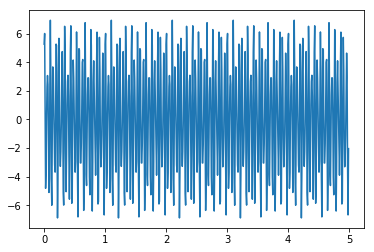

-------------------------------Suma sin------------------------------------
Współczynniki ze znaczącymi wartościami [ 1131.37084990-1131.3708499j   554.25625842 -320.j          554.25625842 +320.j
  1131.37084990+1131.3708499j]
---------------------------------------------------------------------------


C:\Users\prac\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


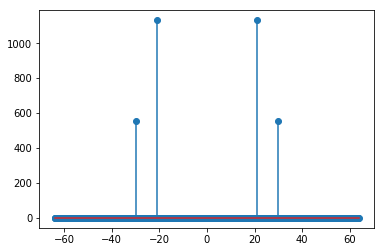

In [13]:
fs = 128
A1 = 2
A2 = 5
t, s1 = sin(f=30, T=5, fs=fs, phi=np.pi/3)
t, s2 = sin(f=21, T=5, fs=fs, phi=np.pi/4)

s3 = A1*s1 + A2*s2
plt.plot(t, s3)
plt.show()
S3 = np.fft.fft(s3)

print('-------------------------------Suma sin------------------------------------')
print('Współczynniki ze znaczącymi wartościami',S3[abs(S3)>0.001]) # 
print('---------------------------------------------------------------------------')

f = np.fft.fftfreq(len(S3), 1/fs)
plt.stem(f,S3)
plt.show()

<hr>

## Widmo mocy dla sygnałów rzeczywistych: Transformaty rzeczywiste i Hermitowskie

> Jeśli sygnał wejściowy jest rzeczywisty to jego transformata jest hermitowska, tzn. współczynnik przy częstości $f_k$ jest sprzężony ze współczynnikiem przy częstości $-f_k$. Oznacza to, że dla sygnałów rzeczywistych współczynniki przy ujemnych częstościach nie wnoszą żadnej dodatkowej informacji. 

>**Rodzina funkcji**  <tt>rfft</tt> wykorzystuje tą symetrię i zwracają tylko dodatnią część widma włącznie z częstością Nyquista. Tak więc, <tt>n</tt> punktów rzeczywistych na wejściu daje na wyjściu $\frac{n}{2}+1$ punktów zespolonych. Funkcje odwrotne w tej rodzinie zakładają tą samą symetrię i aby na wyjściu uzyskać <tt>n</tt>  punktów rzeczywistych na wejściu trzeba podać $\frac{n}{2}+1$ wartości zespolonych.
    
> Dla kompletności powiedzmy jeszcze, że możliwy jest przypadek odwrotny, tzn. widmo jest czysto rzeczywiste i odpowiada mu hermitowski sygnał zespolony. Tę symetrię wykorzystują funkcje <tt>hfft</tt>, które zakładają, że operujemy w dziedzinie czasu $\frac{n}{2}+1$ punktami zespolonymi i odpowiadającymi im w dziedzinie częstości $n$ punktami rzeczywistymi.

## Zadanie: widmo mocy dźwięku
* Pobierz sygnał http://www.fuw.edu.pl/~jarekz/SYGNALY/klawisz.b.
* wczytaj ten sygnał jako jeden kanał typu int16
* wykreśl ten sygnał
* Jest to dźwięk próbkowany częstościa Fs = 44100
* można go posłuchać za omocą kodu:

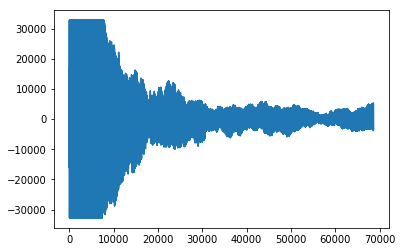

In [14]:
import sounddevice as sd #nalezy zainstalować biblioteke poleceniem w konsoli "pip install sounddevice"
with open('klawisz.b', 'rb') as f_out:
    syg = np.fromfile(f_out, dtype='int16')

plt.plot(syg)
plt.show()
(Fs, syg) = (44100, syg)
sd.play(syg,Fs)

* wykreśl **widmo mocy** tego sygnału tj. **kwadrat modułu transformaty Fouriera** (jest to syg. rzeczywisty więc używamy funkcji z rodziny rfft)

In [ ]:
S = np.fft.rfft(syg)
F = np.fft.rfftfreq(len(syg), 1/fs)
widmo = abs(S)**2
plt.stem(F,widmo)
#plt.axis([50,fs/2,0,np.max(widmo)])
plt.show()

Przy okazji: wczytywanie pliku wav, tak aby był on tablicą numpy można zrobić jak w poniższym kodzie, wówczas w Fs mamy częstość próbkowania sygnału audio, a w macierzy syg mamy  sygnał (może być stereo: lewy i prawy kanał).

* Można pobrać do bieżacego katalogu przykładowy plik wav: [Candy_Dulfer_-_Lily_Was_Here.wav](https://drive.google.com/open?id=0B7k6Z_ViZid5WXc0WVQ4U0d2TVk) i wczytać oraz odtworzyć go tym kodem:

In [23]:
from scipy.io.wavfile import read
import sounddevice as sd

(Fs, syg) = read('Candy_Dulfer_-_Lily_Was_Here.wav')
print(syg.shape)
sd.play(syg, Fs)

(1587600,)


## Co musimy z tego zapamiętać?
* Analiza Fourierowska polega na rzutowaniu sygnału na sygnały próbne: sinusoidy o znanych częstościach
* Ze współczynników transformaty można odtworzyć oryginalny sygnał: mamy więc dwie reprezentacje sygnału:
 * w dziedzinie czasu
 * w dziedzinie częstości
 * między reprezentacjami przechodzimy za pomocą transformaty Fouriera i odwrotnej transformaty Fouriera
* reprezentacja częstościowa jest na ogół zespolona: widmo mocy to kwadrat modułu transformaty Fouriera